In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load Uber trip data for April 2014
uber_apr14 = pd.read_csv(r"C:\Users\SunLand\Desktop\New folder\Uber Fare Prediction\uber-raw-data-apr14.csv")

In [9]:
# Display basic information about the dataset
print(uber_apr14.info())
# Display descriptive statistics
print(uber_apr14.describe())

# Check for missing values
print(uber_apr14.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.7

In [10]:
# Convert 'Date/Time' to datetime format
uber_apr14['pickup_datetime'] = pd.to_datetime(uber_apr14['pickup_datetime'])

In [11]:
# Extract additional time-related features
uber_apr14['Hour'] = uber_apr14['pickup_datetime'].dt.hour
uber_apr14['DayOfWeek'] = uber_apr14['pickup_datetime'].dt.day_name()
uber_apr14['Month'] = uber_apr14['pickup_datetime'].dt.month

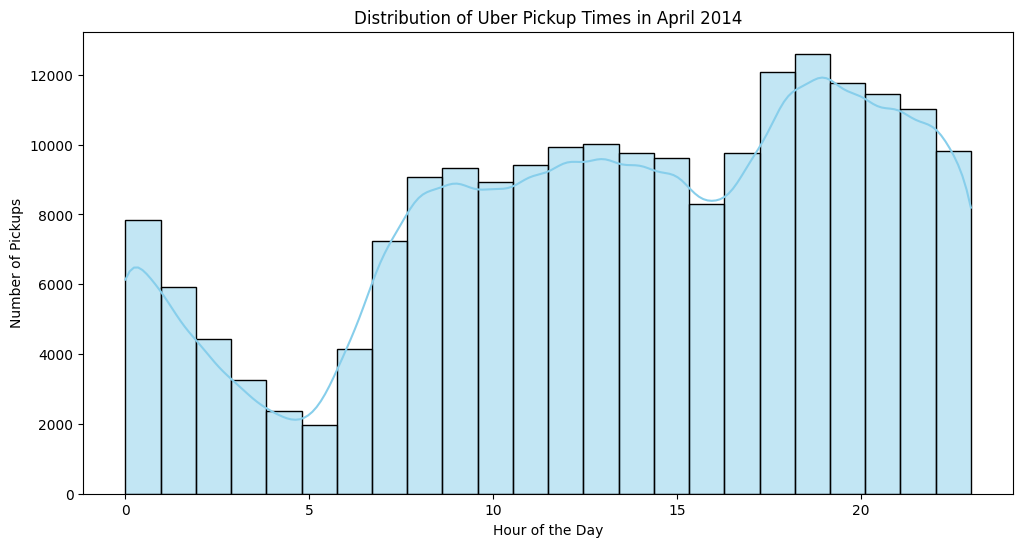

C:\Users\SunLand\AppData\Local\Temp\ipykernel_9444\4142075270.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=uber_apr14, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


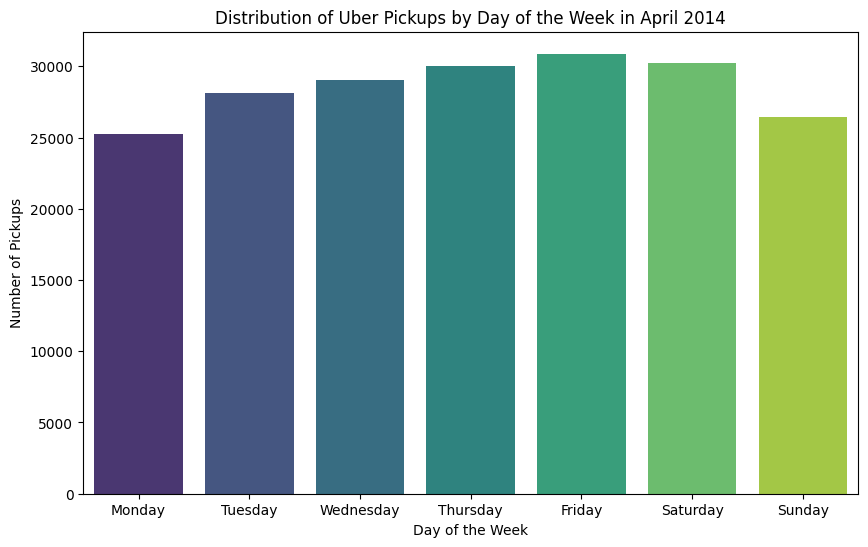

C:\Users\SunLand\AppData\Local\Temp\ipykernel_9444\4142075270.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=uber_apr14, palette='mako')


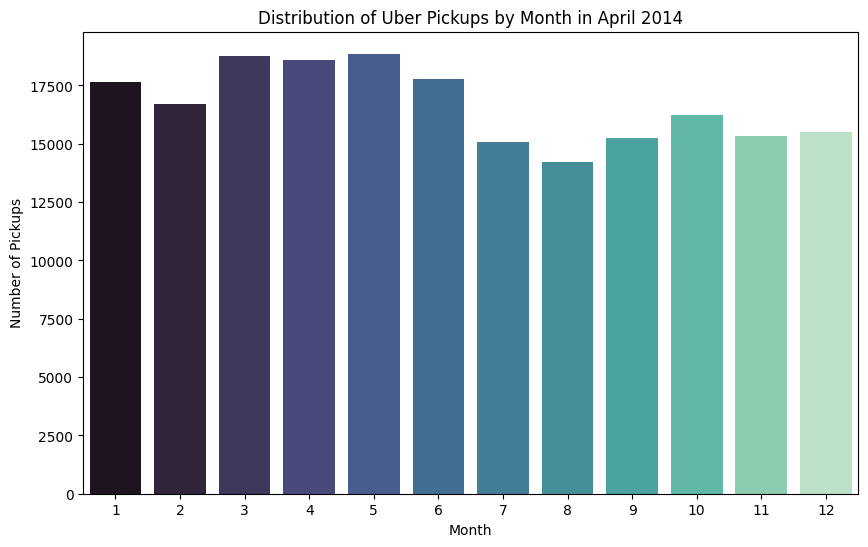

ValueError: could not convert string to float: '2015-05-07 19:52:06.0000003'

In [12]:
# Plot a histogram of pickup times
plt.figure(figsize=(12, 6))
sns.histplot(uber_apr14['Hour'], bins=24, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Uber Pickup Times in April 2014')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Analyze the distribution of pickups by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=uber_apr14, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Distribution of Uber Pickups by Day of the Week in April 2014')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

# Analyze the distribution of pickups by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=uber_apr14, palette='mako')
plt.title('Distribution of Uber Pickups by Month in April 2014')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

# Analyze the correlation between variables
correlation_matrix = uber_apr14.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Uber Pickup Data (April 2014)')
plt.show()

stats for each month

In [ ]:
import pandas as pd

# Load the Uber dataset for each month
months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
uber_data = {}

for month in months:
    file_path = r"C:\Users\SunLand\Desktop\New folder\Uber Fare Prediction\uber-raw-data-apr14.csv"
    uber_data[month] = pd.read_csv(file_path)
    # Convert 'Date/Time' to datetime format
    uber_data[month]['pickup_datetime'] = pd.to_datetime(uber_data[month]['pickup_datetime'])

# Concatenate the data for all months into a single DataFrame
all_months_data = pd.concat(uber_data.values(), ignore_index=True)

# Extract additional time-related features
all_months_data['Month'] = all_months_data['pickup_datetime'].dt.month_name()

# Group by month and compute statistics
monthly_statistics = all_months_data.groupby('Month').agg({
    'pickup_datetime': 'count',  # Count of pickups
    'pickup_latitude' : ['mean', 'std'],  # Mean and standard deviation of latitude
    'pickup_longitude': ['mean', 'std'],  # Mean and standard deviation of longitude
    # Add more statistics as needed...
})

# Rename columns for better readability
monthly_statistics.columns = ['Pickup Count', 'Mean Latitude', 'Std Latitude', 'Mean Longitude', 'Std Longitude']

# Display the statistics
print(monthly_statistics)

           Pickup Count  Mean Latitude  Std Latitude  Mean Longitude  \
Month                                                                  
April            111636      39.958811      5.629072      -72.556591   
August            85326      39.823933      6.071234      -72.343866   
December          93096      40.026867      5.386697      -72.649731   
February         100170      39.962523      5.613237      -72.527922   
January          106008      40.001399      5.476442      -72.610473   
July              90570      39.981188      5.546435      -72.619379   
June             106722      40.024519      6.099910      -72.601778   
March            112578      40.014394      6.108261      -72.588865   
May              113154      39.382065     13.620423      -71.892371   
November          91872      40.105697     14.075788      -72.728559   
October           97272      40.009639      5.446613      -72.674375   
September         91596      40.005771      5.458532      -72.61

barchart for pickups in Apr-Sep

           Month   Pickup Count
count  12.000000      12.000000
mean    6.500000  100000.000000
std     3.605551    9742.085459
min     1.000000   85326.000000
25%     3.750000   91803.000000
50%     6.500000   98721.000000
75%     9.250000  107950.500000
max    12.000000  113154.000000


C:\Users\SunLand\AppData\Local\Temp\ipykernel_11636\1361765019.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Pickup Count', data=monthly_pickups, palette='viridis')


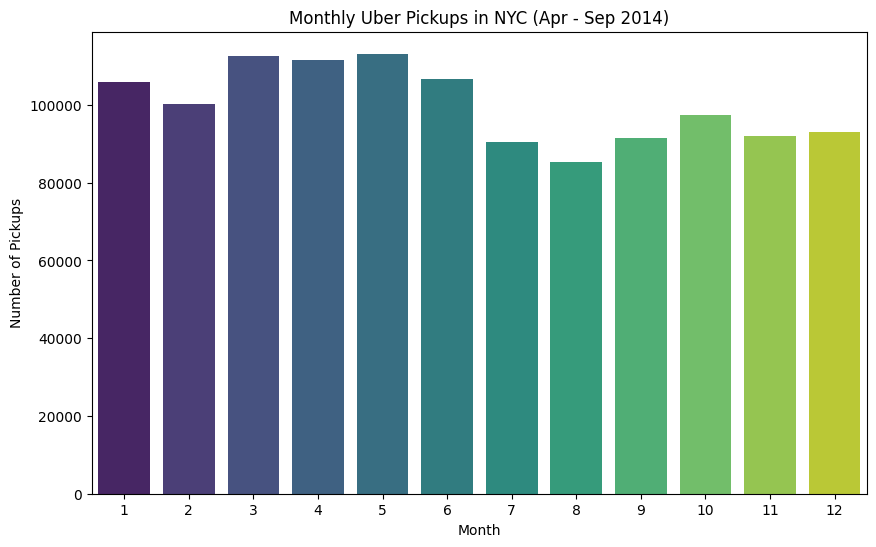

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have loaded the data for each month into the 'uber_data' dictionary

# Concatenate the data for all months
uber_combined = pd.concat(list(uber_data.values()), ignore_index=True)  # Convert the dictionary values to a list

# Convert 'Date/Time' to datetime format
uber_combined['pickup_datetime'] = pd.to_datetime(uber_combined['pickup_datetime'])

# Extract month from the 'Date/Time' column
uber_combined['Month'] = uber_combined['pickup_datetime'].dt.month

# Group by month and count the number of pickups
monthly_pickups = uber_combined.groupby('Month').size().reset_index(name='Pickup Count')

# Display basic statistics
print(monthly_pickups.describe())

# Visualize the monthly pickups
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Pickup Count', data=monthly_pickups, palette='viridis')
plt.title('Monthly Uber Pickups in NYC (Apr - Sep 2014)')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

Average weekdays vs weekends

In [ ]:
import pandas as pd

# Load the Uber trip data for the specific month (replace 'your_file.csv' with the actual file name)
#data = pd.read_csv(r'D:\New folder\uber-raw-data-apr14.csv')

# Convert 'Date/Time' to datetime object
uber_apr14['pickup_datetime'] = pd.to_datetime(uber_apr14['pickup_datetime'])

# Extract day of the week (0 = Monday, 6 = Sunday)
uber_apr14['Day_of_Week'] = uber_apr14['pickup_datetime'].dt.dayofweek

# Differentiate between weekdays (0-4) and weekends (5-6)
uber_apr14['Weekday'] = uber_apr14['Day_of_Week'] < 5  # True for weekdays, False for weekends

# Group by 'Weekday' and calculate average pickups
average_pickups = uber_apr14.groupby('Weekday')['pickup_datetime'].count().mean()

# Separate average pickups for weekdays and weekends
average_pickups_weekdays = uber_apr14[uber_apr14['Weekday']]['pickup_datetime'].count().mean()
average_pickups_weekends = uber_apr14[~uber_apr14['Weekday']]['pickup_datetime'].count().mean()

print(f"Average Pickups (All Days): {average_pickups}")
print(f"Average Pickups (Weekdays): {average_pickups_weekdays}")
print(f"Average Pickups (Weekends): {average_pickups_weekends}")

Average Pickups (All Days): 100000.0
Average Pickups (Weekdays): 143308.0
Average Pickups (Weekends): 56692.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Uber trip data for April to September 2014
months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
file_paths = [f'D:/New folder/uber-raw-data-{month}14.csv' for month in months]

# Combine data from all months
uber_data = pd.concat([pd.read_csv(file_path) for file_path in file_paths])

# Convert 'Date/Time' column to datetime
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Create a new column for day type (weekday or weekend)
uber_data['Day Type'] = uber_data['Date/Time'].dt.day_name()
uber_data['Day Type'] = uber_data['Day Type'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group by day type and calculate average pickups
average_pickups = uber_data.groupby('Day Type').size() / len(months)

# Plot the results
average_pickups.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Pickups on Weekdays and Weekends (Apr-Sep)')
plt.xlabel('Day Type')
plt.ylabel('Average Pickups')
plt.show()